In [3]:
import pandas as pd
df = pd.read_csv('./naturtyper_csv_layer.csv')
print(df.columns.tolist())
df['Natyp_kode']

['Temakode', 'Temanavn', 'Objekt_id', 'Version_id', 'Systid_fra', 'Systid_til', 'Oprettet', 'Oprindkode', 'Oprindelse', 'Statuskode', 'Status', 'Off_kode', 'Offentlig', 'CVR_kode', 'CVR_navn', 'Bruger_id', 'Link', 'Shape_area', 'Shape_length', 'Natyp_kode', 'Natyp_navn', 'Aendr_kode', 'Aendrbegr', 'Sagsbeh', 'Gl_sys_ref', 'Besig_dato', 'Journalnr', 'Vedligehold_status', 'Vedligehold_tid']


0         1
1         4
2         6
3         3
4         3
         ..
312320    6
312321    6
312322    6
312323    3
312324    6
Name: Natyp_kode, Length: 312325, dtype: int64

In [4]:
df_filtered = df[df['Natyp_kode'] == 6]

In [5]:
df_filtered['Shape_area']

2          252.946000
5          645.341733
8           81.784551
13         359.060465
14         773.002146
             ...     
312319     798.086120
312320    1752.970804
312321     355.864154
312322     859.631064
312324     496.144574
Name: Shape_area, Length: 152920, dtype: float64

In [7]:
import geojson

In [12]:
path_to_file = './naturtyper_layer.geojson'

with open(path_to_file, 'r') as f:
    gj = geojson.load(f)

In [28]:
from tqdm import tqdm
len(gj['features']), gj.keys()
gj_features = []
for feature in tqdm(gj['features']):
    if feature['properties']['Natyp_kode'] == 6: # Code for lakes is 6
        gj_features.append(feature)
# gj['features'][0]['properties']
len(gj_features)
gj_features[0]

100%|███████████████████████████████████████████████████████████████████████| 312325/312325 [00:00<00:00, 992219.70it/s]


{"geometry": {"coordinates": [[[[501332.248, 6224773.935], [501334.244, 6224779.934], [501334.244, 6224784.933], [501333.246, 6224790.932], [501327.243, 6224789.932], [501317.249, 6224783.933], [501316.243, 6224780.934], [501319.244, 6224774.935], [501324.25, 6224771.936], [501329.247, 6224770.936], [501332.248, 6224773.935]]]], "type": "MultiPolygon"}, "properties": {"Aendr_kode": 0, "Aendrbegr": "Ikke udfyldt", "Besig_dato": null, "Bruger_id": "00000000-0000-0000-0000-000000000000", "CVR_kode": 29189919, "CVR_navn": "Herning kommune", "Gl_sys_ref": null, "Journalnr": null, "Link": null, "Natyp_kode": 6, "Natyp_navn": "Sø", "Objekt_id": "0460cd7c-5353-11e2-af2b-00155d01e765", "Off_kode": 1, "Offentlig": "Synlig for alle", "Oprettet": "2006-12-31T01:00:00", "Oprindelse": "Ikke udfyldt", "Oprindkode": 0, "Sagsbeh": null, "Shape_area": 252.94599999301087, "Shape_length": 0.0, "Status": "Gældende / Vedtaget", "Statuskode": 3, "Systid_fra": "2006-12-31T01:00:00", "Systid_til": null, "Temak

In [88]:
import rasterio.features
import numpy as np
from shapely.geometry import MultiPolygon
for i, feature in tqdm(enumerate(gj_features)):
    geometry = feature['geometry']
    coords = geometry['coordinates']
    if geometry['type'] != 'MultiPolygon':
        print(f'NOT A MULTIPOLYGON!!! Idx {i}')
    b = poly.bounds # min x, min y, max x, max y
    x, y = b[2] - b[0], b[-1] - b[1]
    # print(len(coords))
    # print(coords)
    # coords_np = np.squeeze(np.array(coords))
    poly = MultiPolygon(coords)
    mask = rasterio.features.rasterize([poly], out_shape=(round(x*100), round(y*100)))
    if i == 2:
        break
# example = gj_features[0]['geometry']
# print(example)

2it [00:00, 188.47it/s]


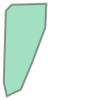

In [89]:
poly

In [90]:
np.where(mask==1), np.unique(mask)

((array([], dtype=int64), array([], dtype=int64)), array([0], dtype=uint8))

In [72]:
b = poly.bounds # min x, min y, max x, max y
x, y = b[2] - b[0], b[-1] - b[1]

(7.338199999998324, 15.92879999987781)

In [66]:
dir(poly)

['__and__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 '_geom',
 '_geom_prepared',
 '_ndim',
 '_repr_svg_',
 'almost_equals',
 'area',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'contains_properly',
 'convex_hull',
 'coords',
 'covered_by',
 'covers',
 'crosses',
 'difference',
 'disjoint',
 'distance',
 'dwithin',
 'envelope',
 'equals',
 'equals_exact',
 'geom_type',
 'geometryType',
 'geoms',
 'has_z',
 'hausdorff_distance',
 'interpolate',
 'intersection',
 'intersects',
 'is_closed',
 'is_empty',
 'is_ring',
 'is_simple',
 'is_valid',
 'length',
 'line_i

In [34]:


coords = example['coordinates']
print(coords)

[[[[501332.248, 6224773.935], [501334.244, 6224779.934], [501334.244, 6224784.933], [501333.246, 6224790.932], [501327.243, 6224789.932], [501317.249, 6224783.933], [501316.243, 6224780.934], [501319.244, 6224774.935], [501324.25, 6224771.936], [501329.247, 6224770.936], [501332.248, 6224773.935]]]]


In [45]:

coords_np = np.array(coords[0][0])
coords_np.shape, coords_np

((11, 2),
 array([[ 501332.248, 6224773.935],
        [ 501334.244, 6224779.934],
        [ 501334.244, 6224784.933],
        [ 501333.246, 6224790.932],
        [ 501327.243, 6224789.932],
        [ 501317.249, 6224783.933],
        [ 501316.243, 6224780.934],
        [ 501319.244, 6224774.935],
        [ 501324.25 , 6224771.936],
        [ 501329.247, 6224770.936],
        [ 501332.248, 6224773.935]]))

In [48]:

poly = Polygon(coords[0][0])

In [49]:
rasterio.features.rasterize([poly], out_shape=(60, 50))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
from shapely.geometry import Polygon
import rasterio.features
import matplotlib.pyplot as plt

poly = Polygon([(0, 50), (10, 10), (30, 0), (45, 45), (0, 50)])
img = rasterio.features.rasterize([poly], out_shape=(60, 50))
plt.imshow(img)